In [1]:
from libraries import MyDAQ
from libraries import functions as H
import matplotlib.pyplot as plt
import numpy as np
import nidaqmx as dx
from scipy.signal import sawtooth, square
import libraries
from libraries import PMConverter
from scipy.fft import rfft, rfftfreq, irfft
import time
all_list = [H.RC_C, H.RCRC_CC, H.RLC_sC, H.RLC_sRC, H.RLC_pC, H.RLC_pRL, H.RL_R, H.CL_C, H.RC_R, H.RCRC_RR, H.RLC_sL, H.RLC_sRL, H.RLC_pL, H.RLC_pRC, H.RL_L, H.CL_L, H.RLC_sR, H.RLC_sLC, H.RLC_pR, H.RLC_pLC]

daq = MyDAQ()
daq.name = 'MyDAQ1'
daq.samplerate = 200000
read_channel = 'AI0'	
write_channel = 'AO0'

In [2]:
duration = 5
amplitude = 8
freq = 2
phase = 0
_, signal = daq.generateWaveform('sine', daq.samplerate, freq, amplitude, phase, duration)


In [3]:
PM = PMConverter()
daq = MyDAQ()

In [10]:
daq.name = 'MyDAQ1'
daq.samplerate = int(2e5)
read_channel = 'AI0'	
write_channel = 'AO0'
carrierFrequency = 2e4
amplitude = 2

text = "Hi!"
binary = PM.text_to_binary(text)
fm_signal = PM.binary_to_pm(binary, fmType=1)

voltages = PM.pm_to_voltage_array(fm_signal, sps=2000, f=carrierFrequency, fs=daq.samplerate, A=amplitude)


48000
writeTask.start took 0.022763 seconds.


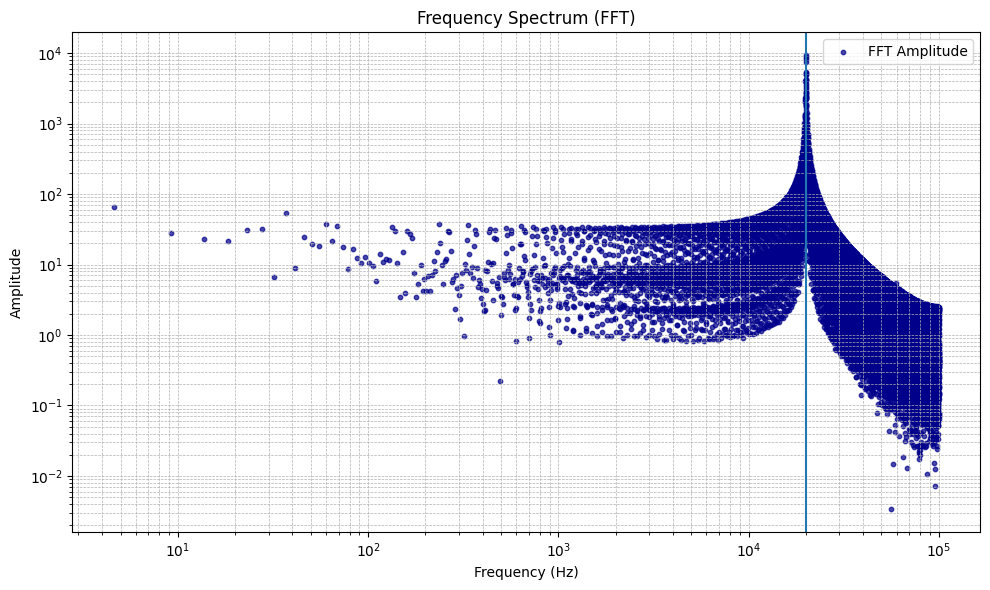

Recovered Binary: 01001000 01101001 00100001
Recovered Text: Hi!


In [11]:
print(len(voltages))
data = daq.readwrite(voltages, read_channel, write_channel)

window = np.hanning(len(data))
windowed_data = data * window
fft = np.fft.rfft(windowed_data)
freqs = np.fft.rfftfreq(len(data), 1 / daq.samplerate)
amplitude = np.abs(fft)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(freqs, amplitude, s=10, color='darkblue', alpha=0.7, label='FFT Amplitude')
plt.axvline(carrierFrequency)
plt.xscale('log')
plt.yscale('log')  # Optional: helps when amplitudes span multiple orders
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum (FFT)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

binary_back = PM.pm_to_binary(fm_signal, fmType=1)
print("Recovered Binary:", binary_back)

text_back = PM.binary_to_text(binary_back)
print("Recovered Text:", text_back)


In [ ]:
tArray = np.linspace(0, len(voltages) / daq.samplerate, len(voltages), endpoint=False)
print(voltages.shape)
data = daq.readwrite(voltages, read_channel, write_channel)
tArrayd = np.linspace(0, len(data) / daq.samplerate, len(data), endpoint=False)

print(len(tArrayd), len(data), len(voltages))

plt.scatter(tArray, voltages, s=1)  # s=1 to avoid huge dots
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Time-Domain Signal')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.scatter(tArrayd, data)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Time-Domain Signal')
plt.grid(True)
plt.tight_layout()
plt.show()

